Work done by ZAMMA Ghania

GitHub URL of this project: https://github.com/ZAMMA-Ghania/HAH913E-Physical-activity-00

# `Devoir HAH913E-Activité-Physique-00 .jpynb`

This notebook focuses on integrating ENMO (Euclidean Norm Minus One) over time intervals (epochs) of 10, 30, and 60 seconds using raw accelerometer data. The aim is to visualize physical activity recorded by an Axivity AX3 sensor worn on the non-dominant wrist.

The CSV file 0_z.csv contains accelerometer data organized in a specific format. The first line is a comment indicating that the measurements are expressed in units of gravity (# accelerometer data in g). The second line defines the column headers — t, x, y, and z — corresponding to time and the three acceleration components. The subsequent lines contain the actual data values, separated by commas. When loading the file, the first line is skipped, and pandas is instructed to use the second line as the header. This approach allows the data to be directly imported into four columns (t, x, y, and z), ready for further analysis and processing.

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def load_data():
    df = pd.read_csv('0_z.csv', skiprows=1)  
    return df

df = load_data()
df.head()

,t,x,y,z
0,0.00,-0.0938,-0.0156,0.9531
1,0.02,-0.0938,-0.0156,0.9531
2,0.04,-0.0938,-0.0156,0.9531
3,0.06,-0.0938,-0.0156,0.9531
4,0.08,-0.0938,-0.0156,0.9531


## `What is ENMO?`


ENMO (Euclidean Norm Minus One) is computed as the Euclidean norm of the three acceleration components — x, y, and z — minus 1 g, which corresponds to the acceleration due to Earth’s gravity. Any resulting negative values are set to zero, as they do not reflect actual physical activity.

In [28]:
def compute_enmo(df):
    norm = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    df['enmo'] = np.maximum(norm - 1, 0)
    return df

df = compute_enmo(df)
df.head()

,t,x,y,z,enmo
0,0.00,-0.0938,-0.0156,0.9531,0.0
1,0.02,-0.0938,-0.0156,0.9531,0.0
2,0.04,-0.0938,-0.0156,0.9531,0.0
3,0.06,-0.0938,-0.0156,0.9531,0.0
4,0.08,-0.0938,-0.0156,0.9531,0.0



## Integrated ENMO over Epochs

I aggregate the ENMO values into epochs of a specified length and compute their mean.
I then create a bar plot to visualize the intensity of physical activity.

## Combined Visualization for 10-Second Epochs

We present two plots in a single figure:

-A bar plot showing the average ENMO per 10-second epoch

-A line plot of the raw ENMO over time

This approach enables the identification of both sustained activity and short bursts.

In [33]:
def aggregate_enmo_gmin(df, epoch_length):
    df['epoch'] = (df['t'] // epoch_length).astype(int)
    aggregated = df.groupby('epoch')['enmo'].sum().reset_index()
    aggregated['enmo_gmin'] = aggregated['enmo'] * (epoch_length / 60)  # correct factor
    aggregated['time_min'] = aggregated['epoch'] * epoch_length / 60
    return aggregated

In [34]:
aggregated_10s = aggregate_enmo_gmin(df, epoch_length=10)

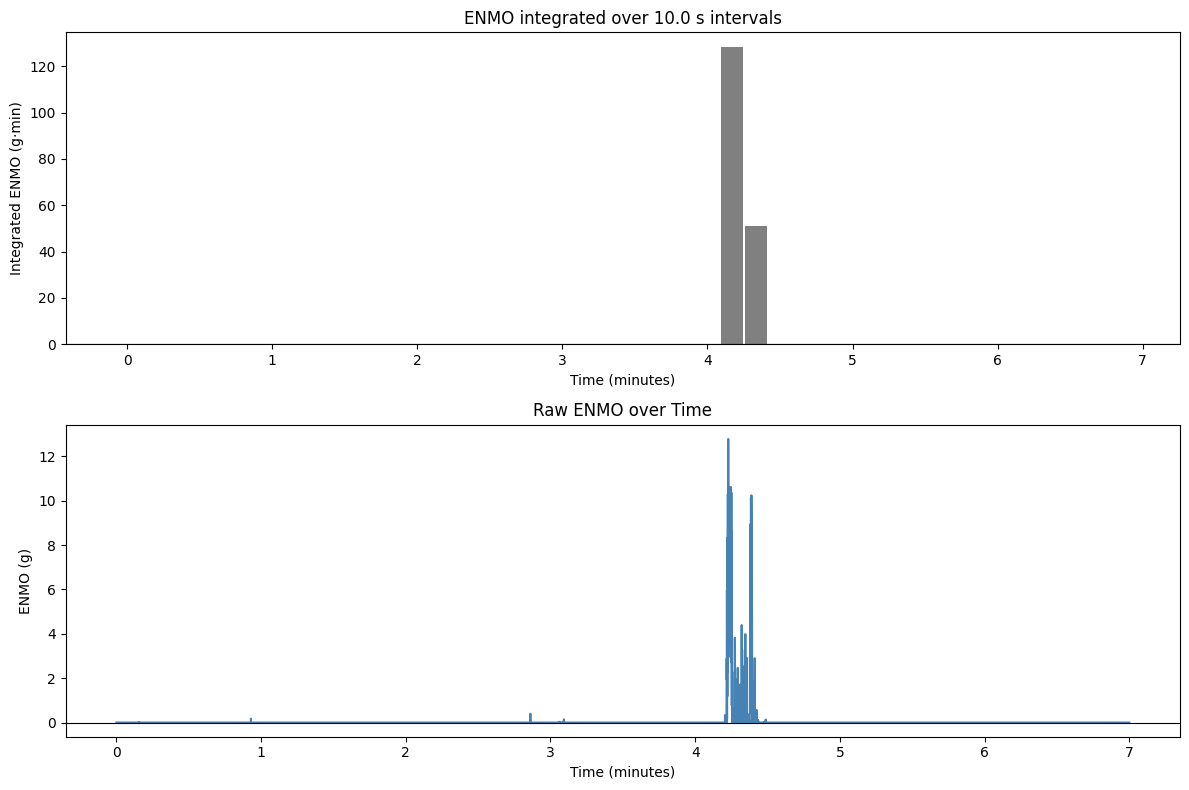

In [35]:
df['time_min'] = df['t'] / 60  # convert seconds to minutes
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Bar plot: ENMO aggregated
axs[0].bar(aggregated_10s['time_min'], aggregated_10s['enmo_gmin'], width=0.15, color='grey')
axs[0].set_title('ENMO integrated over 10.0 s intervals')
axs[0].set_ylabel('Integrated ENMO (g·min)')
axs[0].set_xlabel('Time (minutes)')
axs[0].axhline(0, color='black', linewidth=0.8)

# Line plot: raw ENMO
axs[1].plot(df['time_min'], df['enmo'], color='steelblue')
axs[1].set_title('Raw ENMO over Time')
axs[1].set_xlabel('Time (minutes)')
axs[1].set_ylabel('ENMO (g)')
axs[1].axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('enmo_epoch_10s.png')
plt.show()


# Combined Visualization for 30-Second Epochs

In [36]:
aggregated_30s = aggregate_enmo_gmin(df, epoch_length=30)

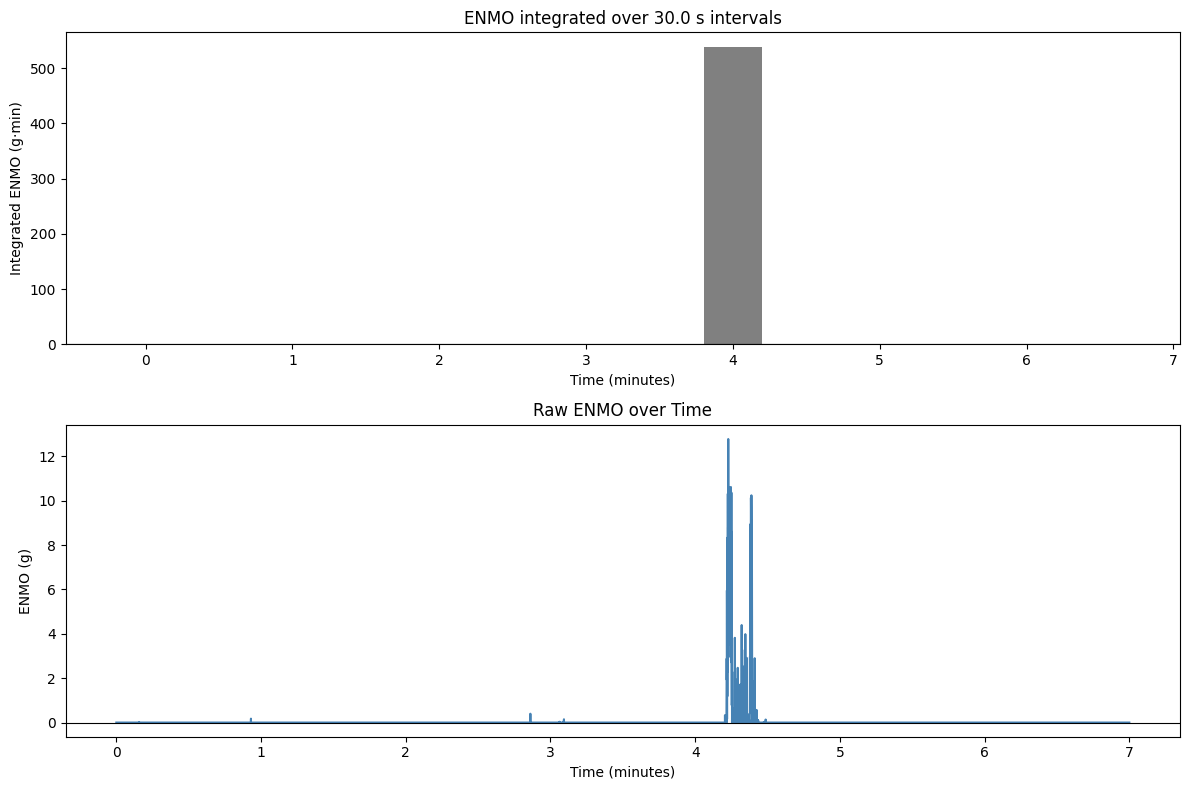

In [37]:
df['time_min'] = df['t'] / 60  # convert seconds to minutes
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Bar plot: ENMO aggregated over 30s
axs[0].bar(aggregated_30s['time_min'], aggregated_30s['enmo_gmin'], width=0.4, color='grey')
axs[0].set_title('ENMO integrated over 30.0 s intervals')
axs[0].set_ylabel('Integrated ENMO (g·min)')
axs[0].set_xlabel('Time (minutes)')
axs[0].axhline(0, color='black', linewidth=0.8)

# Line plot: raw ENMO
axs[1].plot(df['time_min'], df['enmo'], color='steelblue')
axs[1].set_title('Raw ENMO over Time')
axs[1].set_xlabel('Time (minutes)')
axs[1].set_ylabel('ENMO (g)')
axs[1].axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('enmo_epoch_30s.png')
plt.show()

# Combined Visualization for 60-Second Epochs

In [39]:
aggregated_60s = aggregate_enmo_gmin(df, epoch_length=60)

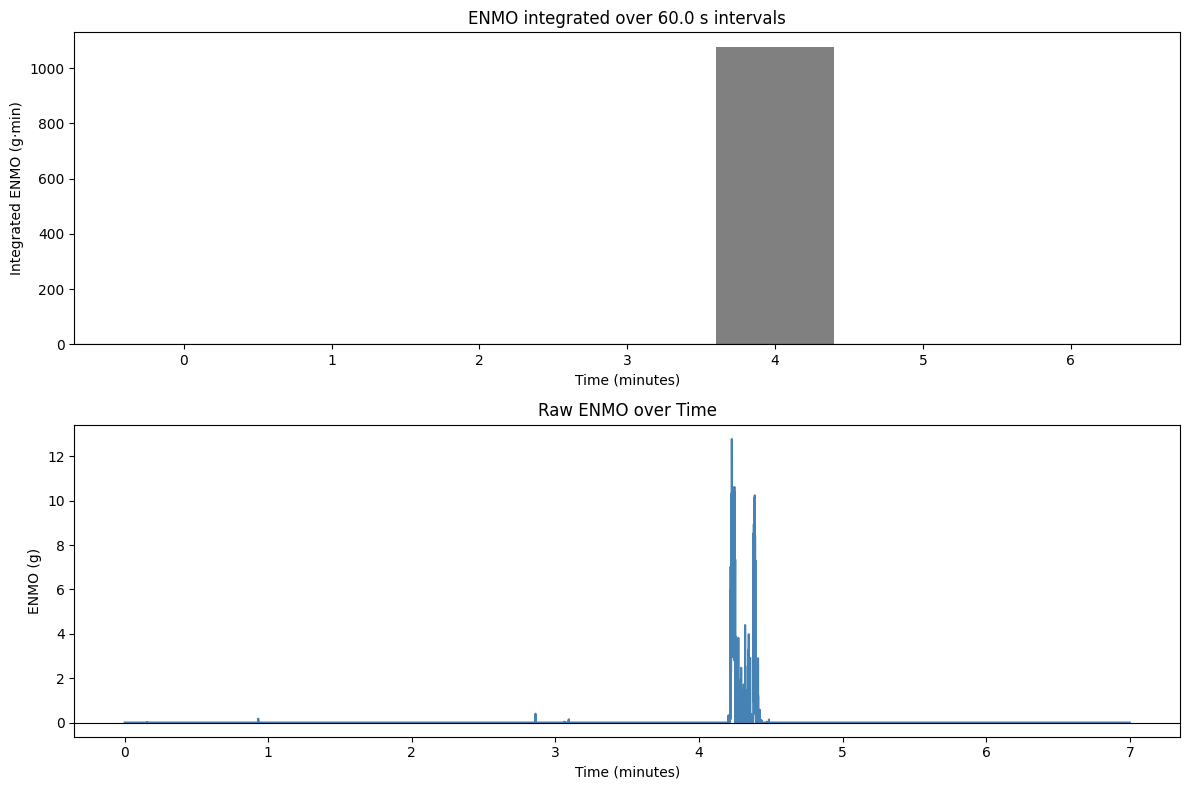

In [40]:
df['time_min'] = df['t'] / 60  # convert seconds to minutes
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Bar plot: ENMO aggregated over 60s
axs[0].bar(aggregated_60s['time_min'], aggregated_60s['enmo_gmin'], width=0.8, color='grey')
axs[0].set_title('ENMO integrated over 60.0 s intervals')
axs[0].set_ylabel('Integrated ENMO (g·min)')
axs[0].set_xlabel('Time (minutes)')
axs[0].axhline(0, color='black', linewidth=0.8)

# Line plot: raw ENMO
axs[1].plot(df['time_min'], df['enmo'], color='steelblue')
axs[1].set_title('Raw ENMO over Time')
axs[1].set_xlabel('Time (minutes)')
axs[1].set_ylabel('ENMO (g)')
axs[1].axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('enmo_epoch_60s.png')
plt.show()